# Annotation and Genothology in DNA Methylation Analysis

In DNA methylation analysis, annotation and genothology tools are critical for interpreting methylation patterns and their biological significance. The following tools are widely used in the analysis:

1. **[Annotatr](https://bioconductor.org/packages/release/bioc/vignettes/annotatr/inst/doc/annotatr-vignette.html)**  

2. **[MissMethyl](https://bioconductor.org/packages/release/bioc/vignettes/missMethyl/inst/doc/missMethyl.html)**


## 0. Setup environment

In [18]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

# setup workdir
folder = "/content/drive/MyDrive/DNAmethylation/"
output = paste0(folder,"result")

In [3]:
%%R

# check the mount point
list.dirs(folder)


[1] "/content/drive/MyDrive/DNAmethylation/"           
[2] "/content/drive/MyDrive/DNAmethylation//data"      
[3] "/content/drive/MyDrive/DNAmethylation//result"    
[4] "/content/drive/MyDrive/DNAmethylation//src"       
[5] "/content/drive/MyDrive/DNAmethylation//src/data"  
[6] "/content/drive/MyDrive/DNAmethylation//src/result"


### Install packaegs

In [ ]:
%%R
# Install necessary packages
install.packages("ggplot2", quietly = TRUE)  # For data visualization
install.packages("dplyr", quietly = TRUE)    # For data manipulation
install.packages("qs", quietly = TRUE)       # For read data

# Install annotatr from Bioconductor
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}
BiocManager::install("annotatr", quietly = TRUE)

## 1. Annotatr

1.1 CpG Annotations

The CpG islands are the basis for all CpG annotations, and are given by the AnnotationHub package for the given organism. CpG shores are defined as 2Kb upstream/downstream from the ends of the CpG islands, less the CpG islands. CpG shelves are defined as another 2Kb upstream/downstream of the farthest upstream/downstream limits of the CpG shores, less the CpG islands and CpG shores. The remaining genomic regions make up the inter-CGI annotation.

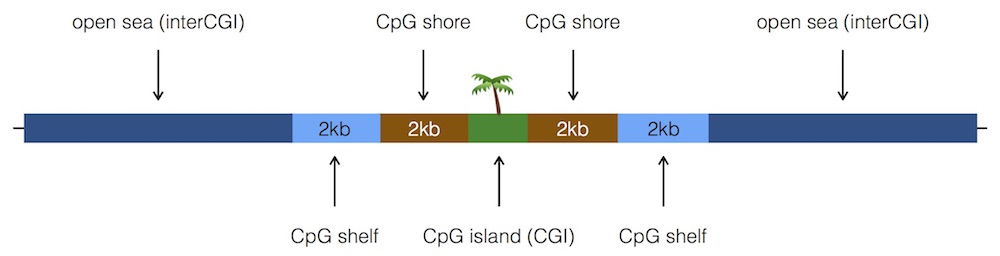

1.2 Genic Annotations

The genic annotations are determined by functions from GenomicFeatures and data from the TxDb.* and org.*.eg.db packages. Genic annotations include 1-5Kb upstream of the TSS, the promoter (< 1Kb upstream of the TSS), 5’UTR, first exons, exons, introns, CDS, 3’UTR, and intergenic regions (the intergenic regions exclude the previous list of annotations). The schematic below illustrates the relationship between the different annotations as extracted from the TxDb.* packages via GenomicFeatures functions.

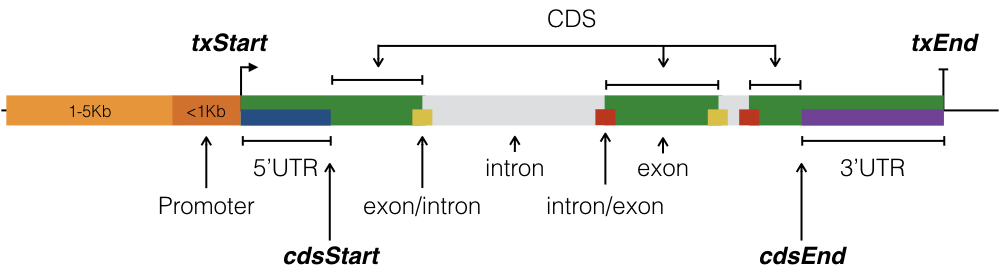

### 1.3 Pratices

#### Build and Annotate

In [11]:
%%R
# Loading library
library(annotatr)
library(ggplot2)
library(dplyr)
library(qs)

Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103


In [20]:
%%R

# Read GRanges object
file=paste0(folder,"data/DMRrange.hg19.RDS")
dm_regions = qread(file)

In [21]:
%%R

dm_regions

GRanges object with 1866 ranges and 8 metadata columns:
         seqnames              ranges strand |   no.cpgs min_smoothed_fdr
            <Rle>           <IRanges>  <Rle> | <integer>        <numeric>
     [1]     chr6 166579057-166583523      * |        24      0.00000e+00
     [2]     chr2 107501733-107504523      * |        21     1.41421e-286
     [3]     chr6   28602513-28603779      * |        36     3.04122e-265
     [4]     chr2 155553986-155556321      * |        19     1.73675e-219
     [5]     chr6     7248862-7248983      * |         3     6.13891e-217
     ...      ...                 ...    ... .       ...              ...
  [1862]     chr2 131673894-131673963      * |         2      6.93068e-09
  [1863]     chr2   32502781-32502885      * |         3      7.03749e-09
  [1864]     chrX   55291317-55291412      * |         4      7.07747e-09
  [1865]     chr2 220381808-220381812      * |         2      7.30589e-09
  [1866]     chr6 151713355-151713358      * |         2

In [22]:
%%R

# Select annotations for intersection with regions
# Note inclusion of custom annotation, and use of shortcuts
annots = c(
    'hg19_cpgs',
    'hg19_basicgenes',
    'hg19_genes_intergenic',
    'hg19_genes_intronexonboundaries')

In [28]:
%%R

# Install GenomicFeatures and TxDb.Hsapiens.UCSC.hg19.knownGene package
BiocManager::install("TxDb.Hsapiens.UCSC.hg19.knownGene")


Update all/some/none? [a/s/n]: n


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)
Installing package(s) 'TxDb.Hsapiens.UCSC.hg19.knownGene'
trying URL 'https://bioconductor.org/packages/3.20/data/annotation/src/contrib/TxDb.Hsapiens.UCSC.hg19.knownGene_3.2.2.tar.gz'
Content type 'application/x-gzip' length 18669702 bytes (17.8 MB)
downloaded 17.8 MB


The downloaded source packages are in
	‘/tmp/RtmpRjtuJO/downloaded_packages’
Old packages: 'ggplot2', 'later', 'ragg', 'rlang'


In [31]:
%%R
# Install org.Hs.eg.db package from Bioconductor
BiocManager::install("org.Hs.eg.db")

Update all/some/none? [a/s/n]: n


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)
Installing package(s) 'org.Hs.eg.db'
trying URL 'https://bioconductor.org/packages/3.20/data/annotation/src/contrib/org.Hs.eg.db_3.20.0.tar.gz'
Content type 'application/x-gzip' length 98233708 bytes (93.7 MB)
downloaded 93.7 MB


The downloaded source packages are in
	‘/tmp/RtmpRjtuJO/downloaded_packages’
Old packages: 'ggplot2', 'later', 'ragg', 'rlang'


In [32]:
%%R

# Build the annotations (a single GRanges object)
annotations = build_annotations(genome = 'hg19', annotations = annots)
annotations

/root/.cache/R/AnnotationHub
  does not exist, create directory? (yes/no): yes


GRanges object with 2599305 ranges and 5 metadata columns:
                  seqnames        ranges strand |          id       tx_id
                     <Rle>     <IRanges>  <Rle> | <character> <character>
        [1]           chr1   10874-11873      + |  promoter:1  uc001aaa.3
        [2]           chr1   10874-11873      + |  promoter:2  uc010nxq.1
        [3]           chr1   10874-11873      + |  promoter:3  uc010nxr.1
        [4]           chr1   68091-69090      + |  promoter:4  uc001aal.1
        [5]           chr1 320084-321083      + |  promoter:5  uc001aaq.2
        ...            ...           ...    ... .         ...         ...
  [2599301] chrUn_gl000245       1-36651      * | inter:20609        <NA>
  [2599302] chrUn_gl000246       1-38154      * | inter:20610        <NA>
  [2599303] chrUn_gl000247       1-36422      * | inter:20611        <NA>
  [2599304] chrUn_gl000248       1-39786      


'select()' returned 1:1 mapping between keys and columns
Building promoters...
Building 1to5kb upstream of TSS...
Building intergenic...
Building 5UTRs...
Building 3UTRs...
Building exons...
Building introns...
Building intron exon boundaries...
  |======================================================================| 100%
snapshotDate(): 2024-10-28
Building CpG islands...
downloading 1 resources
retrieving 1 resource
  |======================================================================| 100%
loading from cache
Building CpG shores...
Building CpG shelves...
Building inter-CpG-islands...


In [34]:
%%R
# Intersect the regions we read in with the annotations
dm_annotated = annotate_regions(
                    regions = dm_regions,
                    annotations = annotations,
                    ignore.strand = TRUE,
                    quiet = FALSE)

Annotating...


In [35]:
%%R
dm_annotated

GRanges object with 24890 ranges and 9 metadata columns:
          seqnames              ranges strand |   no.cpgs min_smoothed_fdr
             <Rle>           <IRanges>  <Rle> | <integer>        <numeric>
      [1]     chr6 166579057-166583523      * |        24                0
      [2]     chr6 166579057-166583523      * |        24                0
      [3]     chr6 166579057-166583523      * |        24                0
      [4]     chr6 166579057-166583523      * |        24                0
      [5]     chr6 166579057-166583523      * |        24                0
      ...      ...                 ...    ... .       ...              ...
  [24886]     chr2 220381808-220381812      * |         2      7.30589e-09
  [24887]     chr2 220381808-220381812      * |         2      7.30589e-09
  [24888]     chr2 220381808-220381812      * |         2      7.30589e-09
  [24889]     chr6 151713355-151713358      * |         2      7.40258e-09
  [24890]     chr6 151713355-151713358     

In [36]:
%%R
# save annotation
saveRDS(dm_annotated, file=paste0(output,"/dm_annotated.rds"))

In [37]:
%%R
# Coerce to a data.frame
df_dm_annotated = data.frame(dm_annotated)
head(df_dm_annotated)

  seqnames     start       end width strand no.cpgs min_smoothed_fdr
1     chr6 166579057 166583523  4467      *      24                0
2     chr6 166579057 166583523  4467      *      24                0
3     chr6 166579057 166583523  4467      *      24                0
4     chr6 166579057 166583523  4467      *      24                0
5     chr6 166579057 166583523  4467      *      24                0
6     chr6 166579057 166583523  4467      *      24                0
      Stouffer        HMFDR     Fisher    maxdiff   meandiff overlapping.genes
1 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
2 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
3 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
4 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
5 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
6 9.714344e-81 5.445203e-06 1.4477e-79 -0.6

In [38]:
%%R
write.table(df_dm_annotated, file=paste0(output,"/df_dm_annotated.tsv"), sep="\t", quote=F, row.names = F, col.names = T)

In [39]:
%%R

# summary research
dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
print(dm_annsum)

# A tibble: 12 × 2
   annot.type                          n
   <chr>                           <int>
 1 hg19_cpg_inter                    780
 2 hg19_cpg_islands                  890
 3 hg19_cpg_shelves                  120
 4 hg19_cpg_shores                   930
 5 hg19_genes_1to5kb                 557
 6 hg19_genes_3UTRs                  125
 7 hg19_genes_5UTRs                  785
 8 hg19_genes_exons                 1083
 9 hg19_genes_intergenic             311
10 hg19_genes_intronexonboundaries   790
11 hg19_genes_introns               1169
12 hg19_genes_promoters              968


#### Visualization

After annotating the Differentially Methylated Region (DMR) using **Annotatr**, the next steps involve splitting the annotated files into different categories for further analysis and visualization. The workflow includes:

- **Gene Annotation**
  - Goal: Isolate DMRs that overlap with genomic features such as genes.
  - Process: Filter the annotated DMR file to include only entries where the annotation type corresponds to gene features (e.g., exons, promoters, or gene bodies)

- **CpG Annotation**
  - Goal: Identify DMRs that overlap with CpG islands or other CpG-related annotations.
  - Process: Filter the annotated DMR file for entries that correspond to CpG regions, such as CpG islands, shores, or shelves.


- **Visualization**
  - Goal: Visualize the distribution of annotated DMRs across different genomic features (e.g., genes, CpG islands).
  - Process: Generate plots to show the overlap of DMRs with genes and CpG regions.

Filter the annotated DMR file to include only entries where the annotation type corresponds to gene features


In [7]:
%%R

# Load the DMR annotation file
dmr_annotation <- read.table(paste0(output,"/df_dm_annotated.tsv"), sep="\t", header=TRUE)

# Filter for gene annotations (hg19_genes)
gene_annotation <- dmr_annotation[grep("hg19_genes", dmr_annotation$annot.type), ]

# Extract the gene region from the annotation type
gene_annotation$gene_region <- sapply(gene_annotation$annot.type, function(x) strsplit(x, "_")[[1]][3])

In [6]:
%%R
head(gene_annotation)

  seqnames     start       end width strand no.cpgs min_smoothed_fdr
1     chr6 166579057 166583523  4467      *      24                0
2     chr6 166579057 166583523  4467      *      24                0
3     chr6 166579057 166583523  4467      *      24                0
4     chr6 166579057 166583523  4467      *      24                0
5     chr6 166579057 166583523  4467      *      24                0
6     chr6 166579057 166583523  4467      *      24                0
      Stouffer        HMFDR     Fisher    maxdiff   meandiff overlapping.genes
1 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
2 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
3 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
4 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
5 9.714344e-81 5.445203e-06 1.4477e-79 -0.6233333 -0.3397222                 T
6 9.714344e-81 5.445203e-06 1.4477e-79 -0.6

In [8]:
%%R

dim(gene_annotation)

[1] 21737    24


In [4]:
%%R
install.packages("dplyr", quietly = TRUE)    # For data manipulation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpnnM4QD/downloaded_packages’
In addition: Warning message:
In install.packages("dplyr", quietly = TRUE) :
  installation of package ‘dplyr’ had non-zero exit status


In [11]:
%%R
install.packages("ggplot2", quietly = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/RtmpnnM4QD/downloaded_packages’


In [12]:
%%R

library(dplyr)
library(ggplot2)

Data processing

In [8]:
%%R

# Subset desired columns (1st, 2nd, 3rd, 4th, and 21st columns)
gene_annotation_subset <- gene_annotation[, c(1, 2, 3, 4, 24)]

# Remove duplicate rows based on the 'start' column, aggregating gene regions
gene_region_aggregated <- aggregate(gene_region ~ start, unique(gene_annotation), paste, collapse = ",")

# Collect the first gene region from the aggregated values
gene_region_aggregated$first_gene_region <- sapply(gene_region_aggregated$gene_region, function(x) strsplit(x, ",")[[1]][1])

# Merge the aggregated gene region data with the original gene annotations
merged_gene_data <- merge(gene_annotation, gene_region_aggregated, by = "start")

# Reorder columns so that 'seqnames' comes first
merged_gene_data <- merged_gene_data %>% relocate(seqnames)

head(merged_gene_data)

  seqnames  start    end width strand no.cpgs min_smoothed_fdr     Stouffer
1     chr2 287148 287395   248      *       4     6.868875e-10 6.907061e-04
2     chr2 287148 287395   248      *       4     6.868875e-10 6.907061e-04
3     chr6 290588 290692   105      *       2     1.053349e-13 7.530568e-07
4     chr6 290588 290692   105      *       2     1.053349e-13 7.530568e-07
5     chr2 419684 420052   369      *       2     5.312784e-11 2.418222e-04
6     chr2 438095 438323   229      *       3     1.192613e-09 8.519536e-06
         HMFDR       Fisher    maxdiff    meandiff   overlapping.genes
1 0.0026261034 6.396031e-05 -0.1566667 -0.08458333 AC079779.4, FAM150B
2 0.0026261034 6.396031e-05 -0.1566667 -0.08458333 AC079779.4, FAM150B
3 0.0004823859 1.747576e-06  0.2566667  0.23333333                <NA>
4 0.0004823859 1.747576e-06  0.2566667  0.23333333                <NA>
5 0.0002793460 8.940740e-05  0.2950000  0.13500000                <NA>
6 0.0014696731 1.825149e-05  0.2416667  0.

In [9]:
%%R
dim(merged_gene_data)

[1] 21737    26


In [10]:
%%R
# Write the processed gene annotation data to a file
write.table(merged_gene_data, paste0(output, "/DMR_gene_annotation_processed.tsv"), col.names = TRUE, row.names = FALSE, sep = "\t", quote = FALSE)

Prepare for ploting


In [15]:
%%R

# Create a data frame for plotting and calculate the percentage of each region
gene_region_plot_data <- as.data.frame(table(gene_region_aggregated$first_gene_region))
gene_region_plot_data$percentage <- round(gene_region_plot_data$Freq * 100 / sum(gene_region_plot_data$Freq), 2)

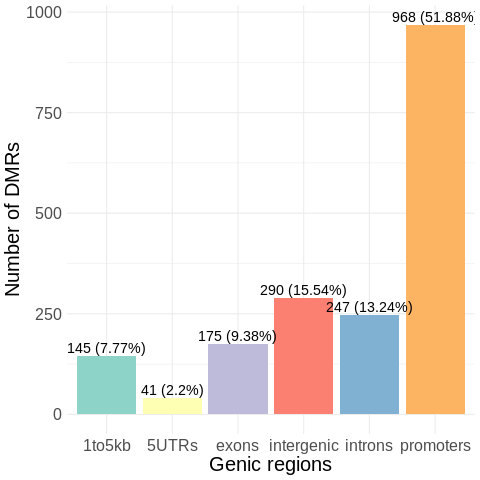

In [16]:
%%R
# Plotting the distribution of gene regions in DMRs
ggplot(data = gene_region_plot_data, aes(x = Var1, y = Freq, fill = Var1)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(Freq, " (", percentage, "%", ")")), vjust = -0.3, size = 5) +
  theme_minimal() +
  labs(y = "Number of DMRs", x = "Genic regions") +
  theme(text = element_text(size = 20)) +
  theme(legend.position = "NULL") +
  scale_fill_brewer(palette = "Set3")

In [17]:
%%R

# Save the plot as a PDF
ggsave(paste0(output, "/DMR_Genic_regions.pdf"), width = 10)

Saving 10 x 6.67 in image


Filter the annotated DMR file for entries that correspond to CpG regions, such as CpG islands, shores, or shelves.

In [18]:
%%R

# Filter for methylation annotations (CpG sites)
methylation_annotation <- dmr_annotation[grep("cpg", dmr_annotation$annot.type), ]

# Extract the methylation annotation type
methylation_annotation$methylation_region <- sapply(methylation_annotation$annot.type, function(x) strsplit(x, "_")[[1]][3])


In [19]:
%%R

head(methylation_annotation)

   seqnames     start       end width strand no.cpgs min_smoothed_fdr
45     chr6 166579057 166583523  4467      *      24     0.000000e+00
46     chr6 166579057 166583523  4467      *      24     0.000000e+00
47     chr6 166579057 166583523  4467      *      24     0.000000e+00
64     chr2 107501733 107504523  2791      *      21    1.414214e-286
65     chr2 107501733 107504523  2791      *      21    1.414214e-286
66     chr2 107501733 107504523  2791      *      21    1.414214e-286
       Stouffer        HMFDR      Fisher    maxdiff   meandiff
45 9.714344e-81 5.445203e-06 1.44770e-79 -0.6233333 -0.3397222
46 9.714344e-81 5.445203e-06 1.44770e-79 -0.6233333 -0.3397222
47 9.714344e-81 5.445203e-06 1.44770e-79 -0.6233333 -0.3397222
64 2.955575e-58 3.171041e-05 1.13582e-61 -0.4833333 -0.2786508
65 2.955575e-58 3.171041e-05 1.13582e-61 -0.4833333 -0.2786508
66 2.955575e-58 3.171041e-05 1.13582e-61 -0.4833333 -0.2786508
   overlapping.genes annot.seqnames annot.start annot.end annot.width

In [20]:
%%R

dim(methylation_annotation)

[1] 3153   24


Process data

In [21]:
%%R
# Subset desired columns (1st, 2nd, 3rd, 4th, and 21st columns)
methylation_annotation_subset <- methylation_annotation[, c(1, 2, 3, 4, 24)]

# Remove duplicate rows based on the 'start' column, aggregating methylation annotations
methylation_region_aggregated <- aggregate(methylation_region ~ start, unique(methylation_annotation_subset), paste, collapse = ",")

# Collect the first methylation region from the aggregated values
methylation_region_aggregated$first_methylation_region <- sapply(methylation_region_aggregated$methylation_region, function(x) strsplit(x, ",")[[1]][1])

# Merge the aggregated methylation region data with the original methylation annotations
merged_methylation_data <- merge(methylation_annotation, methylation_region_aggregated, by = "start")

# Reorder columns so that 'seqnames' comes first
merged_methylation_data <- merged_methylation_data %>% relocate(seqnames)

# Write the processed methylation annotation data to a file
write.table(merged_methylation_data, paste0(output, "/DMR_CpG_annotation_processed.tsv"), col.names = TRUE, row.names = FALSE, sep = "\t", quote = FALSE)

In [ ]:
%%R
merged_methylation_data

     seqnames     start       end width strand no.cpgs min_smoothed_fdr
1        chr2    287148    287395   248      *       4     6.868875e-10
2        chr2    287148    287395   248      *       4     6.868875e-10
3        chr6    290588    290692   105      *       2     1.053349e-13
4        chr2    419684    420052   369      *       2     5.312784e-11
5        chr2    419684    420052   369      *       2     5.312784e-11
6        chr2    438095    438323   229      *       3     1.192613e-09
7        chr2    467799    468413   615      *       5     3.737133e-11
8        chr2    467799    468413   615      *       5     3.737133e-11
9        chr2    493506    493627   122      *       3     9.113007e-14
10       chr6    524022    524159   138      *       2     2.528743e-12
11       chr2    628881    629121   241      *       5     8.256208e-19
12       chr2    628881    629121   241      *       5     8.256208e-19
13       chr2    650497    650969   473      *       2     8.242

Exception ignored from cffi callback <function _consolewrite_ex at 0x7c7cd640d760>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 140, in _consolewrite_ex
    consolewrite_print(s)
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 122, in consolewrite_print
    print(s, end='', flush=True)
KeyboardInterrupt: 


Streaming output truncated to the last 5000 lines.
1308         <NA>  hg19_cpg_shores               shores
1309         <NA>  hg19_cpg_shores               shores
1310         <NA> hg19_cpg_islands              islands
1311         <NA>  hg19_cpg_shores               shores
1312         <NA> hg19_cpg_islands              islands
1313         <NA>  hg19_cpg_shores               shores
1314         <NA>  hg19_cpg_shores               shores
1315         <NA>   hg19_cpg_inter                inter
1316         <NA> hg19_cpg_islands              islands
1317         <NA>  hg19_cpg_shores               shores
1318         <NA>   hg19_cpg_inter                inter
1319         <NA>   hg19_cpg_inter                inter
1320         <NA>   hg19_cpg_inter                inter
1321         <NA> hg19_cpg_islands              islands
1322         <NA> hg19_cpg_islands              islands
1323         <NA> hg19_cpg_islands              islands
1324         <NA> hg19_cpg_islands              islan

Prepare for plotting

In [22]:
%%R
# Create a data frame for plotting and calculate the percentage of each CpG region
cpg_region_plot_data <- as.data.frame(table(methylation_region_aggregated$first_methylation_region))
cpg_region_plot_data$percentage <- round(cpg_region_plot_data$Freq * 100 / sum(cpg_region_plot_data$Freq), 2)

In [27]:
%%R
cpg_region_plot_data

     Var1 Freq percentage
1   inter  751      40.25
2 islands  890      47.70
3 shelves   75       4.02
4  shores  150       8.04


Plotting

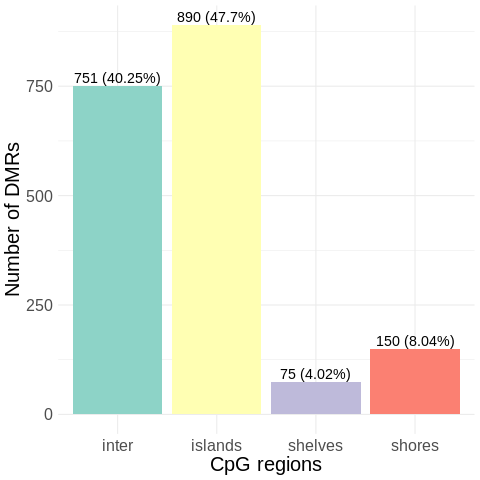

In [24]:
%%R
# Plotting the distribution of CpG regions in DMRs
ggplot(data = cpg_region_plot_data, aes(x = Var1, y = Freq, fill = Var1)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(Freq, " (", percentage, "%", ")")), vjust = -0.3, size = 5) +
  theme_minimal() +
  labs(y = "Number of DMRs", x = "CpG regions") +
  theme(text = element_text(size = 20)) +
  theme(legend.position = "NULL") +
  scale_fill_brewer(palette = "Set3")

In [26]:
%%R
# Save the plot as a PDF
ggsave(paste0(output, "/DMR_CpG_regions.pdf"), width = 10)

Saving 10 x 6.67 in image
